In [1]:
import os,sys,string, time
import ROOT
from math import *
from ROOT import gPad, TTree, TObject, TFile, gDirectory, TH1D, TH2D, TH3D, TCanvas, gROOT, TGaxis, gStyle, TColor, TLegend, THStack, TChain, TLatex, TText, TCollection, kRed, kBlue
from array import array
import matplotlib.pyplot as plt
import numpy as np
import uproot
import pandas as pd
from root_pandas import read_root
from platform import python_version
import scipy
from scipy import stats
import uproot3
import math
from matplotlib.patches import Rectangle
from importlib import reload

import Utilities.Plotter as PT
import Utilities.Constants as Constants
import Utilities.Variables_list as Variables
import Utilities.Functions as Functions
import Utilities.Sys_unc_variables as Sys_unc
from Utilities.ipython_exit import exit

print ('Success')

Welcome to JupyROOT 6.24/06
Success


# Reading in .pkl files

In [2]:
Params = {"Run":"run1", #The run number, so far either "run1" or "run3"
          "Load_single_file":False, #This will override everything else, put the desired file in the "single_file" line
          "single_file":"overlay",
          "Load_standard_bkgs":True,
          "Load_DetVars":False,
          "Only_keep_common_DetVar_evs":True,
          "Load_Signal_DetVars":False,
          "Load_data":True,
          "FLATTEN":True, #Have one row per reconstructed object in the analysis dataframe
          "only_presel":False, #Create small files containing only variables necessary for pre-selection, for making pre-selection plots
          "Load_truth_vars":False,
          "Load_lepton_signal":True,
          "Load_pi0_signal":False}

Params, samples = Functions.create_sample_list(Params)
loc_pkls = "pkl_files/"+Params["Run"]+"/current_files/"+Params["variables_string"]+"/"

Loading these run1 samples: 
['signal', 'overlay', 'dirtoverlay', 'beamoff', 'beamgood']


In [3]:
samples_dict = {}

for sample in samples:
    if sample in Constants.Detector_variations:
        file = pd.read_pickle(loc_pkls+"DetVars/overlay_"+Params["Run"]+"_"+Params["variables_string"]+f"_{sample}_"+Params["Flat_state"]+"_"+Params["Reduced_state"]+".pkl")
        samples_dict[sample] = file
    if Params["Load_Signal_DetVars"] == True:
        file = pd.read_pickle(loc_pkls+"Signal_DetVars/"+Params["Run"]+f"_{sample}_"+Params["Reduced_state"]+".pkl")
        samples_dict[sample] = file
    else:
        if sample == 'signal':
            for HNL_mass in Constants.HNL_mass_samples:
                # file = pd.read_pickle(loc_pkls+f"signal_{HNL_mass}MeV_"+Params["Run"]+"_"+Params["variables_string"]+"_"+Params["Flat_state"]+"_final_gen.pkl")
                file = pd.read_pickle(loc_pkls+f"signal_{HNL_mass}MeV_"+Params["Run"]+"_"+Params["variables_string"]+"_"+Params["Flat_state"]+"_ultimate.pkl")
                samples_dict[HNL_mass] = file
        elif sample == 'pi0_signal':
            for HNL_mass in Constants.HNL_mass_pi0_samples:
                # file = pd.read_pickle(loc_pkls+f"{sample}_{HNL_mass}MeV_"+Params["Run"]+"_"+Params["variables_string"]+"_"+Params["Flat_state"]+"_final_gen.pkl")
                # file = pd.read_pickle(loc_pkls+f"{sample}_{HNL_mass}MeV_"+Params["Run"]+"_"+Params["variables_string"]+"_"+Params["Flat_state"]+"_ultimate.pkl")
                file = pd.read_pickle(loc_pkls+f"{sample}_{HNL_mass}MeV_"+Params["Run"]+"_"+Params["variables_string"]+"_"+Params["Flat_state"]+"_FINAL.pkl")
                samples_dict[str(HNL_mass)+"_pi0"] = file
        elif (Params["Load_single_file"] == True) and (isinstance(sample,int)):
            HNL_mass = sample
            # file = pd.read_pickle(loc_pkls+f"signal_{HNL_mass}MeV_"+Params["Run"]+"_"+Params["variables_string"]+"_"+Params["Flat_state"]+"_final_gen.pkl")
            file = pd.read_pickle(loc_pkls+f"signal_{HNL_mass}MeV_"+Params["Run"]+"_"+Params["variables_string"]+"_"+Params["Flat_state"]+"_ultimate.pkl")
            samples_dict[HNL_mass] = file
        else: 
            # file = pd.read_pickle(loc_pkls+f"{sample}_"+Params["Run"]+"_"+Params["variables_string"]+"_"+Params["Flat_state"]+"_final_gen.pkl")
            file = pd.read_pickle(loc_pkls+f"{sample}_"+Params["Run"]+"_"+Params["variables_string"]+"_"+Params["Flat_state"]+"_ultimate.pkl")
            samples_dict[sample] = file

print(samples_dict.keys())

dict_keys([2, 10, 20, 50, 100, 150, 180, 200, 220, 240, 245, 'overlay', 'dirtoverlay', 'beamoff', 'beamgood'])


In [4]:
for sample in samples_dict:
    print(f"{sample} length is " + str(len(samples_dict[sample])))
print("Loading these variables:")
print(samples_dict[sample].keys())

2 length is 51135
10 length is 43415
20 length is 47592
50 length is 45943
100 length is 48963
150 length is 46449
180 length is 46772
200 length is 43990
220 length is 31932
240 length is 30754
245 length is 31916
overlay length is 987945
dirtoverlay length is 230185
beamoff length is 184430
beamgood length is 199906
Loading these variables:
Index(['run', 'sub', 'evt', 'nslice', 'n_pfps', 'n_tracks', 'n_showers',
       'swtrig_pre', 'swtrig_post', 'trk_sce_start_x_v', 'trk_sce_start_y_v',
       'trk_sce_start_z_v', 'trk_sce_end_x_v', 'trk_sce_end_y_v',
       'trk_sce_end_z_v', 'shr_theta_v', 'shr_phi_v', 'shr_px_v', 'shr_py_v',
       'shr_pz_v', 'shrclusdir0', 'shrclusdir1', 'shrclusdir2',
       'shr_energy_tot', 'trk_theta_v', 'trk_phi_v', 'trk_dir_x_v',
       'trk_dir_y_v', 'trk_dir_z_v', 'trk_energy', 'trk_energy_hits_tot',
       'trk_energy_tot', 'trk_score_v', 'trk_calo_energy_u_v', 'trk_end_x_v',
       'trk_chipr_best', 'pfnplanehits_U', 'pfnplanehits_V', 'pfnplanehits_Y

## Applying Software Trigger

In [5]:
def Apply_swtrig(df):
    query="swtrig_pre>0"
    df.query(query)

def Apply_flash_shift(df, sample_type):
    #Only required for beam off, overlay, dirtoverlay and signal (i.e all except beamon data)
    if(sample_type=="beamoff"): df["flash_time"]=df["flash_time"] -0.359
    else: df["flash_time"]=df["flash_time"] - 0.304

In [6]:
# swtrig_dict = {}
Pre_swtrig_dict = {}
swtrig = {}
apply_swtrig = True
if(apply_swtrig): print("Applying software trigger!")
for sample in samples_dict:
    Pre_swtrig_dict[sample] = len(samples_dict[sample]) #Should weight this properly, i.e take sum of weights for the total number.
    if(apply_swtrig):
        # Apply_swtrig(samples_dict[sample])
        swtrig[sample] = samples_dict[sample].query("swtrig_pre>0").copy()
    else: swtrig[sample] = samples_dict[sample].copy()
    if sample != "beamgood":
        Apply_flash_shift(swtrig[sample], sample)

Applying software trigger!


In [7]:
for sample in samples_dict:
    swtrig_effic = 100*(len(swtrig[sample])/Pre_swtrig_dict[sample])
    print(f"{sample} efficiency is " + str(swtrig_effic) + "%")

2 efficiency is 100.0%
10 efficiency is 100.0%
20 efficiency is 100.0%
50 efficiency is 100.0%
100 efficiency is 100.0%
150 efficiency is 100.0%
180 efficiency is 100.0%
200 efficiency is 100.0%
220 efficiency is 100.0%
240 efficiency is 100.0%
245 efficiency is 100.0%
overlay efficiency is 99.96710343187121%
dirtoverlay efficiency is 99.75715185611574%
beamoff efficiency is 100.0%
beamgood efficiency is 100.0%


# Plotting variables before preselection

In [8]:
#Want to have arrows drawn on for where the preselection cut goes
HNL_mass = 100
if Params["Load_pi0_signal"]:
    HNL_mass = f"{HNL_mass}_pi0" #only plotting one at a time
variable = 'topological_score'

samples_plotting = {"overlay":swtrig["overlay"],
                    "dirtoverlay":swtrig["dirtoverlay"],
                    "beamoff":swtrig["beamoff"],
                    "signal":swtrig[HNL_mass]}

if Params["Run"] == "run1":
    sample_norms = {"overlay":Constants.SF_overlay_run1,
                    "dirtoverlay":Constants.SF_dirt_run1,
                    "beamoff":Constants.SF_EXT_run1,
                    "signal":Constants.run1_POT_scaling_dict[HNL_mass]}
    flat_sys_vars_dict = Sys_unc.run1_Sys_unc
elif Params["Run"] == "run3":
    sample_norms = {"overlay":Constants.SF_overlay_run3,
                    "dirtoverlay":Constants.SF_dirt_run3,
                    "beamoff":Constants.SF_EXT_run3,
                    "signal":Constants.run3_POT_scaling_dict[HNL_mass]}
    flat_sys_vars_dict = Sys_unc.run3_Sys_unc

if Params["Load_data"] == True:
    data_dict = {"beamgood":samples_dict["beamgood"]}
    data_norm = {"beamgood":1.0} #No scaling as this is data, should have scaled MC to this POT.
    samples_plotting.update(data_dict)
    sample_norms.update(data_norm)
    
PT.HNL_scaling_calculator(samples_plotting,sample_norms)


The ratio of overlay to HNL events is 19751905

The ratio of all bkgs to HNL events is 51007125



In [9]:
for sample in samples_plotting:
    print(sample)
    
print(Constants.Preselection_dict_for_plot)

overlay
dirtoverlay
beamoff
signal
beamgood
{'nslice': 'nslice==1', 'flash_time': 'flash_time > 6.55 and flash_time < 16.5', 'nu_flashmatch_score': 'nu_flashmatch_score < 15', 'NeutrinoEnergy2': 'NeutrinoEnergy2 < 500', 'contained_fraction': 'contained_fraction > 0.9', 'trk_score': 'trk_score < 0.97', 'n_pfps': 'n_pfps < 6'}


## Plot data and MC

In [ ]:
#Calculate sys
Calculate_sys = True
variable = 'nu_flashmatch_score'

reload(PT)
reload(Functions)
reload(Constants)
reload(Sys_unc)

if Params["Run"] == "run1": flat_sys_vars_dict = Sys_unc.run1_Sys_unc
if Params["Run"] == "run3": flat_sys_vars_dict = Sys_unc.run3_Sys_unc
    

In [ ]:
savefig = True

print(f"Plotting {variable} for " + Params["Run"])
if isinstance(Constants.variable_names_dict[variable],str):x_string = Constants.variable_names_dict[variable]
else: x_string=variable

# PT.Plot_preselection_variable_data(variable, samples_plotting, sample_norms, xlabel="Neutrino slice",xlims=[-0.5,1.5],bins=2, HNL_mass=HNL_mass,
#                               HNLplotscale=80000000,cutline=0.0,legloc="upper right", show_ev_nums=False, CalcSys=Calculate_sys, xticks = [0,1])
PT.Plot_preselection_variable_data(variable, samples_plotting, sample_norms, xlabel=x_string, xlims=[0, 40], bins=40, HNL_mass=100,
                                   HNLplotscale=6000000,cutline=0.0,legloc="upper right", show_ev_nums=False, CalcSys=Calculate_sys, xticks = [], 
                                   sys_dict=flat_sys_vars_dict, centre_bins=False, hatch=False, ylabel="Events", arrow_place=[])
if variable == "n_pfps":plt.xlim([0.5, 8.5])

# plt.axvline(x=16.5, lw=3, color='green', linestyle = 'dashed')
# plt.arrow(x, y, dx, dy)

Name = ""
if Params["Load_pi0_signal"] == True: Name = "pi0/"
if Calculate_sys==True: Sys_name = "with_sys"
if Calculate_sys==False: Sys_name = "no_sys"

if savefig == True:
    plt.savefig(f"plots/Data_MC_comparison/{Name}Presel_{variable}_" + Params["Run"] + f"_{HNL_mass}MeV_{Sys_name}.png")
    plt.savefig(f"plots/Data_MC_comparison/{Name}Presel_{variable}_" + Params["Run"] + f"_{HNL_mass}MeV_{Sys_name}.pdf")

## Plotting only highest E object

In [ ]:
Highest_E_placeholder = Functions.only_keep_highest_E(samples_dict[HNL_mass])

samples_plotting = {"overlay":samples_dict["overlay"],
           "dirtoverlay":samples_dict["dirtoverlay"],
           "beamoff":samples_dict["beamoff"],
           "signal":Highest_E_placeholder}

PT.Plot_preselection_variable(variable, samples_plotting, sample_norms, xlabel=[],xlims=[1,100],bins=100, HNL_mass=HNL_mass,
                              HNLplotscale=600000,cutline=0.0,legloc="upper right")

plt.savefig("plots/Preselection_variables/" + Params["Run"] + "_" + str(HNL_mass) + "_MeV_" + str(variable)+"_highest_E.png")

## Plot only signal samples before preselection

In [ ]:
#Need a new plotting function for this
reload(Constants)

# Pre-selection cuts

In [10]:
def count_unique_events(df):
    placeholder=df.drop_duplicates(subset=["run","evt","sub"]).copy()
    unique_evs = len(placeholder)
    del placeholder
    return unique_evs

def make_unique_events_df(df):
    placeholder=df.drop_duplicates(subset=["run","evt","sub"]).copy()
    return placeholder

def Preselection_weighted_efficiency(samples, cut_dict, Efficiency_dict, Preselected): #Need to account for weigthing in overlay and dirt samples
    for sample in samples:
        if sample == "overlay" or sample == "dirtoverlay" or sample in Constants.Detector_variations:
            weight = samples[sample]["weight"]
            NumEvs = sum(weight)
        else:
            NumEvs = len(samples[sample])
        
        effic_list = [1.0]
        for cut in cut_dict.keys():
            samples[sample]=samples[sample].query(cut_dict[cut])
            if sample == "overlay" or sample == "dirtoverlay" or sample in Constants.Detector_variations:
                weight = samples[sample]["weight"]
                Num_selected = sum(weight)
            else:
                Num_selected = len(samples[sample])
            effic_list.append(Num_selected/NumEvs)
        Efficiency_dict[sample]=effic_list
        #samples.update()
        Selected = samples[sample].copy()
        placeholder_dict = {sample:Selected}
        Preselected.update(placeholder_dict) 
        
def Flattened_Preselection_weighted_efficiency(samples, cut_dict, Efficiency_dict, Preselected, Run): #Need to account for weigthing in overlay and dirt samples
    for sample in samples:
        if sample == "overlay" or sample == "dirtoverlay" or sample in Constants.Detector_variations:
            # unique_placeholder = make_unique_events_df(samples[sample])
            # weight = unique_placeholder["weight"]
            # NumEvs = sum(weight)
            if Run == "run1":NumEvs = Constants.run1_sum_weights[sample] #This is the total BEFORE any preselection
            if Run == "run3":NumEvs = Constants.run3_sum_weights[sample]
        else:
            if Run == "run1":NumEvs = Constants.run1_event_numbers[sample]
            if Run == "run3":NumEvs = Constants.run3_event_numbers[sample]
        
        effic_list = [1.0]
        for cut in cut_dict.keys():
            samples[sample]=samples[sample].query(cut_dict[cut])
            if sample == "overlay" or sample == "dirtoverlay" or sample in Constants.Detector_variations:
                unique_placeholder = make_unique_events_df(samples[sample])
                weight = unique_placeholder["weight"]
                Num_selected = sum(weight)
            else:
                unique_placeholder = make_unique_events_df(samples[sample])
                Num_selected = len(unique_placeholder)
            effic_list.append(Num_selected/NumEvs)
        Efficiency_dict[sample]=effic_list
        #samples.update()
        Selected = samples[sample].copy()
        placeholder_dict = {sample:Selected}
        Preselected.update(placeholder_dict) 
    
def Preselection_DetVars(samples, cut_dict, Preselected): #Not making efficiency plots for DetVars
    for sample in samples:
        for cut in cut_dict.keys():
            samples[sample]=samples[sample].query(cut_dict[cut])
        Selected = samples[sample].copy()
        placeholder_dict = {sample:Selected}
        Preselected.update(placeholder_dict)

In [11]:
#Make cuts on signal
if Params["Run"] == "run1": 
    if Params["Load_pi0_signal"] == False:
        if Params["FLATTEN"] == True:
            Preselection_dict = Constants.Preselection_dict #Have also saved this in Constants.py, it is also here in case I want to add to or edit the cuts
        else:
            Preselection_dict = Constants.Preselection_dict_for_plot
    if Params["Load_pi0_signal"] == True:
        Preselection_dict = Constants.Preselection_dict_for_plot
        # Preselection_dict = Constants.Preselection_dict_pi0
        
elif Params["Run"] == "run3":
    if Params["Load_pi0_signal"] == False:
        if Params["FLATTEN"] == True:
            Preselection_dict = Constants.Preselection_dict
        else:
            Preselection_dict = Constants.Preselection_dict_for_plot
    if Params["Load_pi0_signal"] == True:
        # Preselection_dict = Constants.Preselection_dict_pi0
        Preselection_dict = Constants.Preselection_dict_for_plot
    Preselection_dict.update(Constants.Preselection_dict_crtveto) #Adding crtveto cut
        
print("Preselection is:" + "\n")
print(Preselection_dict)
print()


Preselection is:

{'nslice': 'nslice==1', 'flash_time': 'flash_time > 6.55 and flash_time < 16.5', 'nu_flashmatch_score': 'nu_flashmatch_score < 15', 'NeutrinoEnergy2': 'NeutrinoEnergy2 < 500', 'Fiducial_cut': 'min_y>-112 and max_y<112 and min_z>14 and max_z<1020 and min_x>9 and max_x<253', 'contained_fraction': 'contained_fraction > 0.9', 'trk_score_v': 'trk_score_v < 0.97', 'n_pfps': 'n_pfps < 6'}



In [12]:
sample_dict_copy = {}
for sample in samples_dict:
    sample_dict_copy[sample] = swtrig[sample].copy()

Efficiency_dict = {}
Preselected_dict = {}
if Params["FLATTEN"] == False:
    Preselection_weighted_efficiency(sample_dict_copy, Preselection_dict, Efficiency_dict, Preselected_dict)
if Params["FLATTEN"] == True:
    Flattened_Preselection_weighted_efficiency(sample_dict_copy, Preselection_dict, Efficiency_dict, Preselected_dict, Params["Run"])

In [13]:
print(sample_dict_copy.keys())
reload(Constants)

dict_keys([2, 10, 20, 50, 100, 150, 180, 200, 220, 240, 245, 'overlay', 'dirtoverlay', 'beamoff', 'beamgood'])


<module 'Utilities.Constants' from '/home/david/HNL/ee_decays/Utilities/Constants.py'>

In [14]:
#Working out the maximum and minimum efficiencies for signal "band"
Preselection_signal_max = []
Preselection_signal_min = []

max_presel_effic = 0.0 #Placeholder to record the highest efficiency
min_presel_effic = 1.0 #Placeholder to record the lowest efficiency

if Params["Load_pi0_signal"] == False: HNL_masses = Constants.HNL_mass_samples
if Params["Load_pi0_signal"] == True: HNL_masses = Constants.HNL_mass_pi0_samples_names

for i in range(len(Preselection_dict)+1):
    for HNL_mass in HNL_masses: #Doesn't work for pi0 samples of course
        if Efficiency_dict[HNL_mass][i] > max_presel_effic:
            max_presel_effic = Efficiency_dict[HNL_mass][i]
        if Efficiency_dict[HNL_mass][i] < min_presel_effic:
            min_presel_effic = Efficiency_dict[HNL_mass][i]
    Preselection_signal_max.append(max_presel_effic)
    Preselection_signal_min.append(min_presel_effic)
    max_presel_effic = 0.0

In [15]:
print(Preselection_signal_max)
print(Preselection_signal_min)

[1.0, 0.6146315760281761, 0.5823234144041709, 0.5385052571753339, 0.5357772094344985, 0.4468787265315178, 0.39951191103469313, 0.3984858149144458, 0.393799051554397]
[1.0, 0.39132676599093597, 0.37653667670764474, 0.3401720535156992, 0.33737686233004965, 0.2751227984477191, 0.24054926863686937, 0.23962658416782, 0.2393552063828055]


In [16]:
print(Preselected_dict.keys())

dict_keys([2, 10, 20, 50, 100, 150, 180, 200, 220, 240, 245, 'overlay', 'dirtoverlay', 'beamoff', 'beamgood'])


## Only select highest energy object and "Prepare" for xgboost

In [17]:
def Prepare_dfs_for_xgb(df): #The default value for missing data in XGB is 0. So this changes those very large negative values to -9999.
    value = -1e15
    new_value = -9999
    first_entry = df.index[0]
    for variable in df.keys():
        if isinstance(df[variable][first_entry], (int,float,np.int32,np.float32,np.uint32)):
        # if variable=='rse_id': #Should come up with a better way of checking the "type" of variable, in case it is not int or float.
        #     continue           #But don't know how to access the first extant row of a dataframe (since some have been removed). 
        # else: 
            if(len(df.loc[df[variable] < value]) > 0):
                df.loc[(df[variable] < value), variable] = new_value #Sets the new value
            if(len(df.loc[df[variable] == -1.0]) > 0):
                df.loc[(df[variable] == -1.0), variable] = new_value #Sets the new value
            if(len(df.loc[df[variable] == np.nan]) > 0):
                df.loc[(df[variable] == np.nan), variable] = new_value #Sets the new value
            if(len(df.loc[df[variable] == np.inf]) > 0):
                df.loc[(df[variable] == np.inf), variable] = new_value #Sets the new value
        # else:
        #     print(variable)
            
    df_edited = df.copy() 
    return df_edited

def Sophisticated_dfs_for_xgb(df): #Requires a minimum of 2 reconstructed objects
    #Take highest E object
    print("Write this")
    variable = 'pfnplanehits_Y'
    # df.loc
    #Look at 2nd highest E object, if within x cm save these two
    #If not look for next highest E object and repeat. 
    #If exhausted of objects, remove event
    
    #Make event-wise variables to feed into BDT
    #Save opening angle
    #Save theta, phi of highest E object
    #Save theta, phi of lower E object
    #Save length of highest E object
    #Save length of lower E object
    #Save invariant mass of 2 objects
    #Save total E of both objects

In [ ]:
Prepared_dict = {}
for sample in Preselected_dict:
    Highest_E_placeholder = Functions.only_keep_highest_E(Preselected_dict[sample])
    Prepared_dict[sample] = Functions.Prepare_dfs_for_xgb(Highest_E_placeholder)
print(Prepared_dict.keys())

# Save pkls

In [ ]:
print_vals = input("Do you want to save the pickle files? y/n ")
if print_vals == "y":
    loc_pkls = "pkl_files/"+Params["Run"]+"/current_files/"+Params["variables_string"]+"/"
    
    for sample in Preselected_dict:
        print("Saving "+Params["Run"]+f" Preselected {sample} .pkl")
        if sample in Constants.Detector_variations:
            #Preselected_dict[sample].to_pickle(loc_pkls+"DetVars/"+"Preselected_overlay_"+Params["Run"]+"_"+Params["variables_string"]+f"_{sample}_"+Params["Flat_state"]+"_"+Params["Reduced_state"]+".pkl")
            Prepared_dict[sample].to_pickle(loc_pkls+"DetVars/"+"Preselected_overlay_"+Params["Run"]+"_"+Params["variables_string"]+
                                            f"_{sample}_"+Params["Flat_state"]+"_"+Params["Reduced_state"]+"_ultimate.pkl")
        if Params["Load_Signal_DetVars"] == True:
            Prepared_dict[sample].to_pickle(loc_pkls+"Signal_DetVars/"+"Preselected_"+Params["Run"]+f"_{sample}_"+Params["Reduced_state"]+"_ultimate.pkl")
        
        if Params["Load_pi0_signal"] == True:
            Prepared_dict[sample].to_pickle(loc_pkls+"pi0_selection/Preselected_"+Params["Run"]+
                                            f"_{sample}"+"_ultimate.pkl")
        
        else:
            #Preselected_dict[sample].to_pickle(loc_pkls+f"Preselected_{sample}_"+Params["Run"]+"_"+Params["variables_string"]+"_"+Params["Flat_state"]+".pkl")
            Prepared_dict[sample].to_pickle(loc_pkls+f"Preselected_{sample}_"+Params["Run"]+"_"+Params["variables_string"]+"_"+Params["Flat_state"]+"_ultimate.pkl")

else:
    print("Not saving pickle files, move onto next cell")

# Plotting Efficiencies

In [18]:
reload(Constants)

var_names = []
for var in Preselection_dict.keys():
    var_names.append(Constants.variable_names_dict[var])
print(var_names)

['Neutrino slice', 'Flash time', 'Flashmatch score', 'Energy in slice', 'Fiducial volume', 'Containted fraction', 'Track score', 'Object multiplicity']


Do you want to save the figure? y/n  y


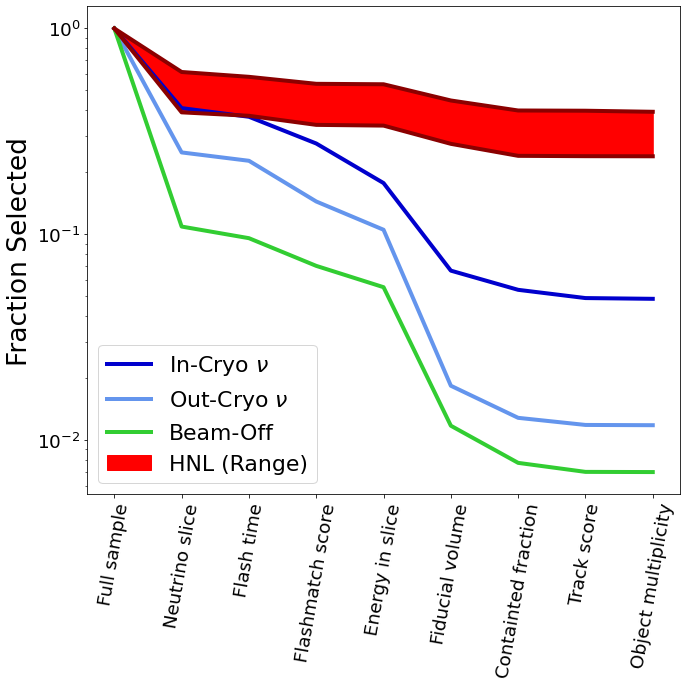

In [19]:
#Signal-only efficiencies
plt.figure(figsize=[10,10])


plotting_effic_dict = {'overlay':Efficiency_dict['overlay'], 'dirtoverlay':Efficiency_dict['dirtoverlay'],
                      'beamoff':Efficiency_dict['beamoff']}
label_effic_dict = {'overlay':fr"In-Cryo $\nu$", 'dirtoverlay':fr"Out-Cryo $\nu$",
                      'beamoff':f"Beam-Off"}

plotting_effic_colours = Constants.sample_colours

log = True

if log == True:
    logscale="log"
elif log == False:
    logscale="linear"

for effic in plotting_effic_dict:
    plt.plot(np.array(range(1, len(Efficiency_dict[effic])+1)),Efficiency_dict[effic],label=label_effic_dict[effic],color=plotting_effic_colours[effic],lw=4,markersize=15)

plt.plot(np.array(range(1, len(Efficiency_dict[effic])+1)),Preselection_signal_max,color="darkred",lw=4,marker="")
plt.plot(np.array(range(1, len(Efficiency_dict[effic])+1)),Preselection_signal_min,color="darkred",lw=4,marker="")
plt.fill_between(np.array(range(1, len(Efficiency_dict[effic])+1)),Preselection_signal_min,Preselection_signal_max,label="HNL (Range)",color="red")
plt.ylabel("Fraction Selected")
plt.xticks(np.array(range(1, len(Efficiency_dict['overlay'])+1)),["Full sample"]+var_names,rotation=80)
plt.yscale(logscale)
plt.legend(loc='lower left',prop={'size': 22})

plt.tight_layout()

save_fig = input("Do you want to save the figure? y/n ")
if Params["FLATTEN"] == False: weighted_name = "_non_weighted"
if Params["FLATTEN"] == True: weighted_name = "_weighted"
if save_fig == 'y':
    plt.savefig("plots/Preselection_efficiencies/Preselection_efficiency_"+Params["Run"]+ "_" + logscale + f"{weighted_name}.png")
    plt.savefig("plots/Preselection_efficiencies/Preselection_efficiency_"+Params["Run"]+ "_" + logscale + f"{weighted_name}.pdf")

In [ ]:
print(Preselection_dict.keys())

## Plotting single mass point and background

In [ ]:
#Plotting efficiency
signal_mass = 220
plt.figure(figsize=[10,10])
plt.plot(np.array(range(1, len(Efficiency_dict[effic])+1)),Efficiency_dict[signal_mass],label=f"{signal_mass} MeV HNL",lw=4,markersize=15)
plt.plot(np.array(range(1, len(Efficiency_dict[effic])+1)),Efficiency_dict['overlay'],label="MC run1 overlay",lw=4,markersize=15)
plt.plot(np.array(range(1, len(Efficiency_dict[effic])+1)),Efficiency_dict['dirtoverlay'],label="MC run1 dirt",lw=4,markersize=15)
plt.plot(np.array(range(1, len(Efficiency_dict[effic])+1)),Efficiency_dict['beamoff'],label="MC run1 EXT",lw=4,markersize=15)
plt.ylabel("Fraction Selected")
plt.xticks(np.array(range(1, len(Efficiency_dict[effic])+1)),["Full sample"]+list(Preselection_dict.keys()),rotation=80)
#plt.yscale("log")
plt.legend()


## Plotting just signal

In [ ]:
plt.figure(figsize=[10,10])

for HNL_mass in Constants.HNL_mass_samples:
    plt.plot(np.array(range(1, len(Efficiency_dict[effic])+1)),Efficiency_dict[HNL_mass],label=f"{HNL_mass} MeV HNL",lw=4,markersize=15)
    
plt.ylabel("Fraction Selected")
plt.xticks(np.array(range(1, len(Efficiency_dict[effic])+1)),["Full sample"]+list(Preselection_dict.keys()),rotation=80)
# plt.yscale("log")
plt.legend()

plt.savefig("plots/Preselection_efficiencies/Signal_only_"+Params["Run"]+"_"+Params["Flat_state"]+".png")

# Testing code

## Making sum of weights (only for unflattened)

In [ ]:
def Sum_weights(df):
    weight = df["weight"] #Just one value per event
    sum_weights = sum(weight)
    return sum_weights

for sample in ['overlay', 'dirtoverlay']:
    sum_weights_placeholder = Sum_weights(samples_dict[sample])
    print(f"{sample} sum weights is " + str(sum_weights_placeholder))

In [ ]:
#Testing what the variables look like
variable = "dvtx_x_boundary"
def test_variables(df):
    test_signal = df[variable]
    print(type(test_signal))
    print(len(test_signal))
test_variables(df_overlay_run1)
test_variables(df_dirt_run1)
test_variables(df_EXT_run1)
test_variables(df_signal_run1)

In [ ]:
#print(overlay_from_pkl['nslice'])
#print("Flat Overlay .pkl is "+str(len(FLAT_overlay_from_pkl))+" entries long.")

print("-----Unflattened-----")
unique_var = overlay_from_pkl["nslice"].unique()
print(unique_var)
unique_var = overlay_from_pkl["n_pfps"].unique()
print(unique_var)
print(overlay_from_pkl["n_pfps"])
print(type(overlay_from_pkl["n_pfps"][0]))

# for var in overlay_from_pkl.keys():
#     if type(overlay_from_pkl[var][1]) == "numpy.ndarray":
#         print(var)

# print("-----Flattened-----")
# unique_var = FLAT_overlay_from_pkl["nslice"].unique()
# print(unique_var)
# unique_var = FLAT_overlay_from_pkl["n_pfps"].unique()
# print(unique_var)
# print(FLAT_overlay_from_pkl["n_pfps"])
# print(type(FLAT_overlay_from_pkl["n_pfps"]))